## NBA Player Stats - Exploratory Data Analysis (EDA)

The NBA dataset contains 2021-2022 regular season NBA player stats per game. 

### Imports

In [2]:
# Import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# suppress future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Prepare the notebook for matplotlib and other libraries- show plots inline
%matplotlib inline

### Load NBA data

In [4]:
# Load data and set parameter index_col=0, because first column contains no useful data. 
nba_df = pd.read_csv('NBA-Clustering/data/interim/nba_stats_cleaned.csv', index_col=0)

### Exploring the data

In [5]:
# Check out data appearance
nba_df.head()

Player Pos   G    MP   FG   FGA    FG%   3P  3PA    3P%  ...  \
0   Precious Achiuwa   C  73  23.6  3.6   8.3  0.439  0.8  2.1  0.359  ...   
1       Steven Adams   C  76  26.3  2.8   5.1  0.547  0.0  0.0  0.000  ...   
2        Bam Adebayo   C  56  32.6  7.3  13.0  0.557  0.0  0.1  0.000  ...   
3       Santi Aldama  PF  32  11.3  1.7   4.1  0.402  0.2  1.5  0.125  ...   
4  LaMarcus Aldridge   C  47  22.3  5.4   9.7  0.550  0.3  1.0  0.304  ...   

     FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.595  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  
1  0.543  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  
2  0.753  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  
3  0.625  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  
4  0.873  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  

[5 rows x 26 columns]

In [6]:
# Obtain overview of data
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 811
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  500 non-null    object 
 1   Pos     500 non-null    object 
 2   G       500 non-null    int64  
 3   MP      500 non-null    float64
 4   FG      500 non-null    float64
 5   FGA     500 non-null    float64
 6   FG%     500 non-null    float64
 7   3P      500 non-null    float64
 8   3PA     500 non-null    float64
 9   3P%     500 non-null    float64
 10  2P      500 non-null    float64
 11  2PA     500 non-null    float64
 12  2P%     500 non-null    float64
 13  eFG%    500 non-null    float64
 14  FT      500 non-null    float64
 15  FTA     500 non-null    float64
 16  FT%     500 non-null    float64
 17  ORB     500 non-null    float64
 18  DRB     500 non-null    float64
 19  TRB     500 non-null    float64
 20  AST     500 non-null    float64
 21  STL     500 non-null    float64
 22  BL

In [7]:
# Get basic summary statistics for each column feature
nba_df.describe()

G          MP          FG         FGA         FG%          3P  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    51.266000   20.835400    3.445000    7.512200    0.456404    1.041400   
std     20.364298    8.824284    2.250387    4.765246    0.085569    0.871174   
min     10.000000    2.800000    0.100000    0.500000    0.125000    0.000000   
25%     36.000000   13.875000    1.775000    3.900000    0.404000    0.300000   
50%     55.000000   20.550000    3.000000    6.300000    0.448000    0.800000   
75%     68.000000   28.250000    4.600000   10.150000    0.496250    1.600000   
max     82.000000   37.900000   11.400000   21.800000    0.761000    4.500000   

              3PA         3P%          2P         2PA  ...         FT%  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     2.977600    0.310636    2.404800    4.535200  ...    0.739044   
std      2.294373    0.113269    1.825542    3.347413  ...    0.154479   
min      0.000000    0.000000    0.100000    0.100000  ...    0.000000   
25%      1.200000    0.289000    1.100000    2.000000  ...    0.681000   
50%      2.450000    0.333000    2.000000    3.800000  ...    0.765500   
75%      4.500000    0.373250    3.200000    6.025000  ...    0.838250   
max     11.700000    1.000000    9.500000   18.300000  ...    1.000000   

              ORB         DRB         TRB        AST         STL        BLK  \
count  500.000000  500.000000  500.000000  500.00000  500.000000  500.00000   
mean     0.912200    2.923600    3.835800    2.09540    0.658800    0.41540   
std      0.739896    1.792548    2.343801    1.86183    0.387405    0.37729   
min      0.000000    0.200000    0.400000    0.00000    0.000000    0.00000   
25%      0.400000    1.600000    2.200000    0.80000    0.400000    0.20000   
50%      0.700000    2.600000    3.400000    1.50000    0.600000    0.30000   
75%      1.200000    3.700000    4.800000    2.80000    0.900000    0.50000   
max      4.600000   11.000000   14.700000   10.80000    2.200000    2.80000   

              TOV          PF         PTS  
count  500.000000  500.000000  500.000000  
mean     1.131400    1.745200    9.354800  
std      0.820305    0.712441    6.258208  
min      0.000000    0.100000    0.300000  
25%      0.600000    1.200000    4.600000  
50%      0.900000    1.700000    7.900000  
75%      1.500000    2.300000   12.425000  
max      4.500000    3.700000   30.600000  

[8 rows x 24 columns]

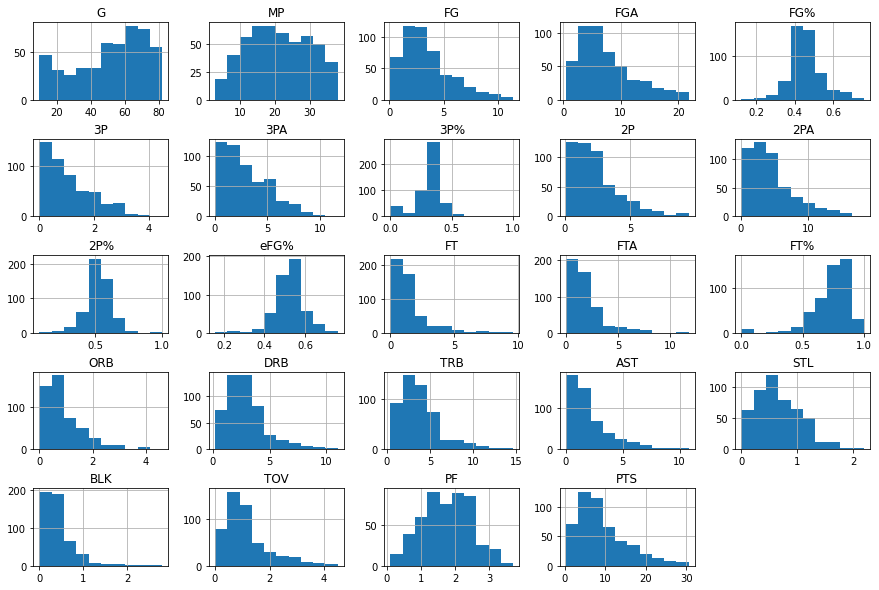

In [6]:
# Review distribution of data by viewing histrogram subplots
_ = nba_df.hist(figsize=(15,10))
_ = plt.subplots_adjust(hspace=0.5);

While some features have a relatively normal distribution, some features can be explored more in depth. "G" seems to have almost a bimodal distribution. "MP" has a relatively wide distribution. "FT", "FTA", "BLK",  have distributions that are moderately skewed right.  

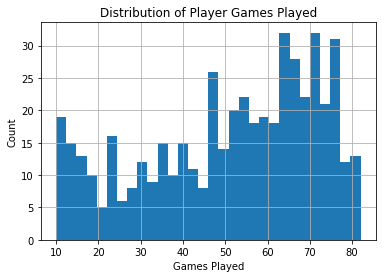

In [7]:
#Review games played distribution
nba_df.G.hist(bins=30)
plt.xlabel('Games Played')
plt.ylabel('Count')
plt.title('Distribution of Player Games Played');

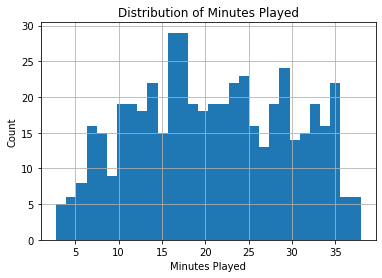

In [8]:
#Review MP distribution
nba_df.MP.hist(bins=30)
plt.xlabel('Minutes Played')
plt.ylabel('Count')
plt.title('Distribution of Minutes Played');

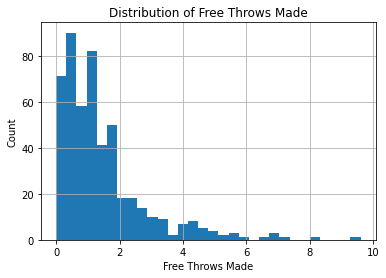

In [9]:
#Review FT distribution
nba_df.FT.hist(bins=30)
plt.xlabel('Free Throws Made')
plt.ylabel('Count')
plt.title('Distribution of Free Throws Made');

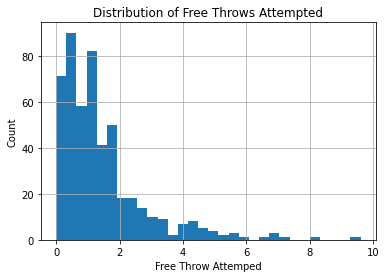

In [10]:
#Review FTA distribution
nba_df.FT.hist(bins=30)
plt.xlabel('Free Throw Attemped')
plt.ylabel('Count')
plt.title('Distribution of Free Throws Attempted');

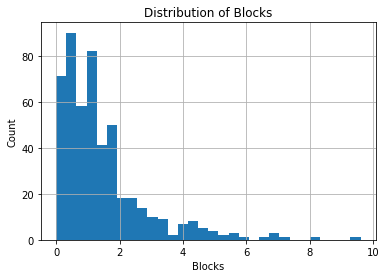

In [11]:
#Review BLK distribution
nba_df.FT.hist(bins=30)
plt.xlabel('Blocks')
plt.ylabel('Count')
plt.title('Distribution of Blocks');

In [12]:
# Check out correlation of data
nba_df.corr()

G        MP        FG       FGA       FG%        3P       3PA  \
G     1.000000  0.614213  0.486052  0.470960  0.203882  0.419940  0.412276   
MP    0.614213  1.000000  0.883189  0.887163  0.140693  0.687310  0.698512   
FG    0.486052  0.883189  1.000000  0.974244  0.217551  0.634081  0.646895   
FGA   0.470960  0.887163  0.974244  1.000000  0.036884  0.740776  0.766716   
FG%   0.203882  0.140693  0.217551  0.036884  1.000000 -0.257671 -0.307938   
3P    0.419940  0.687310  0.634081  0.740776 -0.257671  1.000000  0.985275   
3PA   0.412276  0.698512  0.646895  0.766716 -0.307938  0.985275  1.000000   
3P%   0.234800  0.270632  0.224402  0.279073 -0.224314  0.495143  0.452938   
2P    0.399027  0.759326  0.928766  0.845997  0.391508  0.303003  0.325195   
2PA   0.387298  0.784395  0.943775  0.898226  0.264080  0.379763  0.406670   
2P%   0.190511  0.086971  0.123569 -0.019188  0.772534 -0.169074 -0.182003   
eFG%  0.309829  0.224704  0.230350  0.087206  0.879041  0.048175 -0.026576   
FT    0.360380  0.712768  0.851527  0.824978  0.177483  0.433122  0.460696   
FTA   0.360659  0.702110  0.843340  0.802336  0.229922  0.372259  0.401290   
FT%   0.313533  0.379614  0.326144  0.370795 -0.083431  0.420699  0.427450   
ORB   0.244934  0.277257  0.290825  0.141116  0.617479 -0.261632 -0.269027   
DRB   0.460348  0.710138  0.728192  0.643234  0.395241  0.262537  0.274692   
TRB   0.431778  0.631792  0.648466  0.536436  0.496840  0.118236  0.125379   
AST   0.349021  0.713209  0.715010  0.749924 -0.037384  0.511715  0.542063   
STL   0.442012  0.736047  0.617876  0.639812  0.026522  0.480983  0.500834   
BLK   0.228630  0.361980  0.357263  0.245041  0.488943 -0.065109 -0.059514   
TOV   0.355531  0.769362  0.840470  0.847301  0.098371  0.509760  0.544169   
PF    0.440087  0.683213  0.598856  0.550123  0.351924  0.270558  0.283959   
PTS   0.486101  0.884559  0.990993  0.981845  0.158142  0.688869  0.702101   

           3P%        2P       2PA  ...       FT%       ORB       DRB  \
G     0.234800  0.399027  0.387298  ...  0.313533  0.244934  0.460348   
MP    0.270632  0.759326  0.784395  ...  0.379614  0.277257  0.710138   
FG    0.224402  0.928766  0.943775  ...  0.326144  0.290825  0.728192   
FGA   0.279073  0.845997  0.898226  ...  0.370795  0.141116  0.643234   
FG%  -0.224314  0.391508  0.264080  ... -0.083431  0.617479  0.395241   
3P    0.495143  0.303003  0.379763  ...  0.420699 -0.261632  0.262537   
3PA   0.452938  0.325195  0.406670  ...  0.427450 -0.269027  0.274692   
3P%   1.000000  0.040152  0.087004  ...  0.241439 -0.281201 -0.009514   
2P    0.040152  1.000000  0.981493  ...  0.197187  0.482179  0.770851   
2PA   0.087004  0.981493  1.000000  ...  0.235630  0.384213  0.726753   
2P%  -0.180041  0.233190  0.097853  ... -0.063347  0.410618  0.276522   
eFG%  0.077097  0.260472  0.143405  ...  0.024958  0.420844  0.335591   
FT    0.102025  0.841845  0.858856  ...  0.298746  0.272878  0.668915   
FTA   0.058784  0.860886  0.867206  ...  0.218958  0.350508  0.707786   
FT%   0.241439  0.197187  0.235630  ...  1.000000 -0.125610  0.132982   
ORB  -0.281201  0.482179  0.384213  ... -0.125610  1.000000  0.649503   
DRB  -0.009514  0.770851  0.726753  ...  0.132982  0.649503  1.000000   
TRB  -0.097663  0.741465  0.676893  ...  0.063320  0.812124  0.970837   
AST   0.176868  0.636990  0.696303  ...  0.281885  0.012523  0.474323   
STL   0.162422  0.531302  0.567782  ...  0.266249  0.152421  0.487137   
BLK  -0.169342  0.470549  0.388774  ... -0.033440  0.678156  0.623323   
TOV   0.140845  0.792563  0.833349  ...  0.260634  0.215802  0.660472   
PF    0.040020  0.608667  0.588215  ...  0.200428  0.525376  0.655954   
PTS   0.253498  0.891524  0.916802  ...  0.356844  0.230650  0.704367   

           TRB       AST       STL       BLK       TOV        PF       PTS  
G     0.431778  0.349021  0.442012  0.228630  0.355531  0.440087  0.486101  
MP    0.631792  0.713209  0.736047  0.361980  0.769362  0.683213  0.884559  
FG   

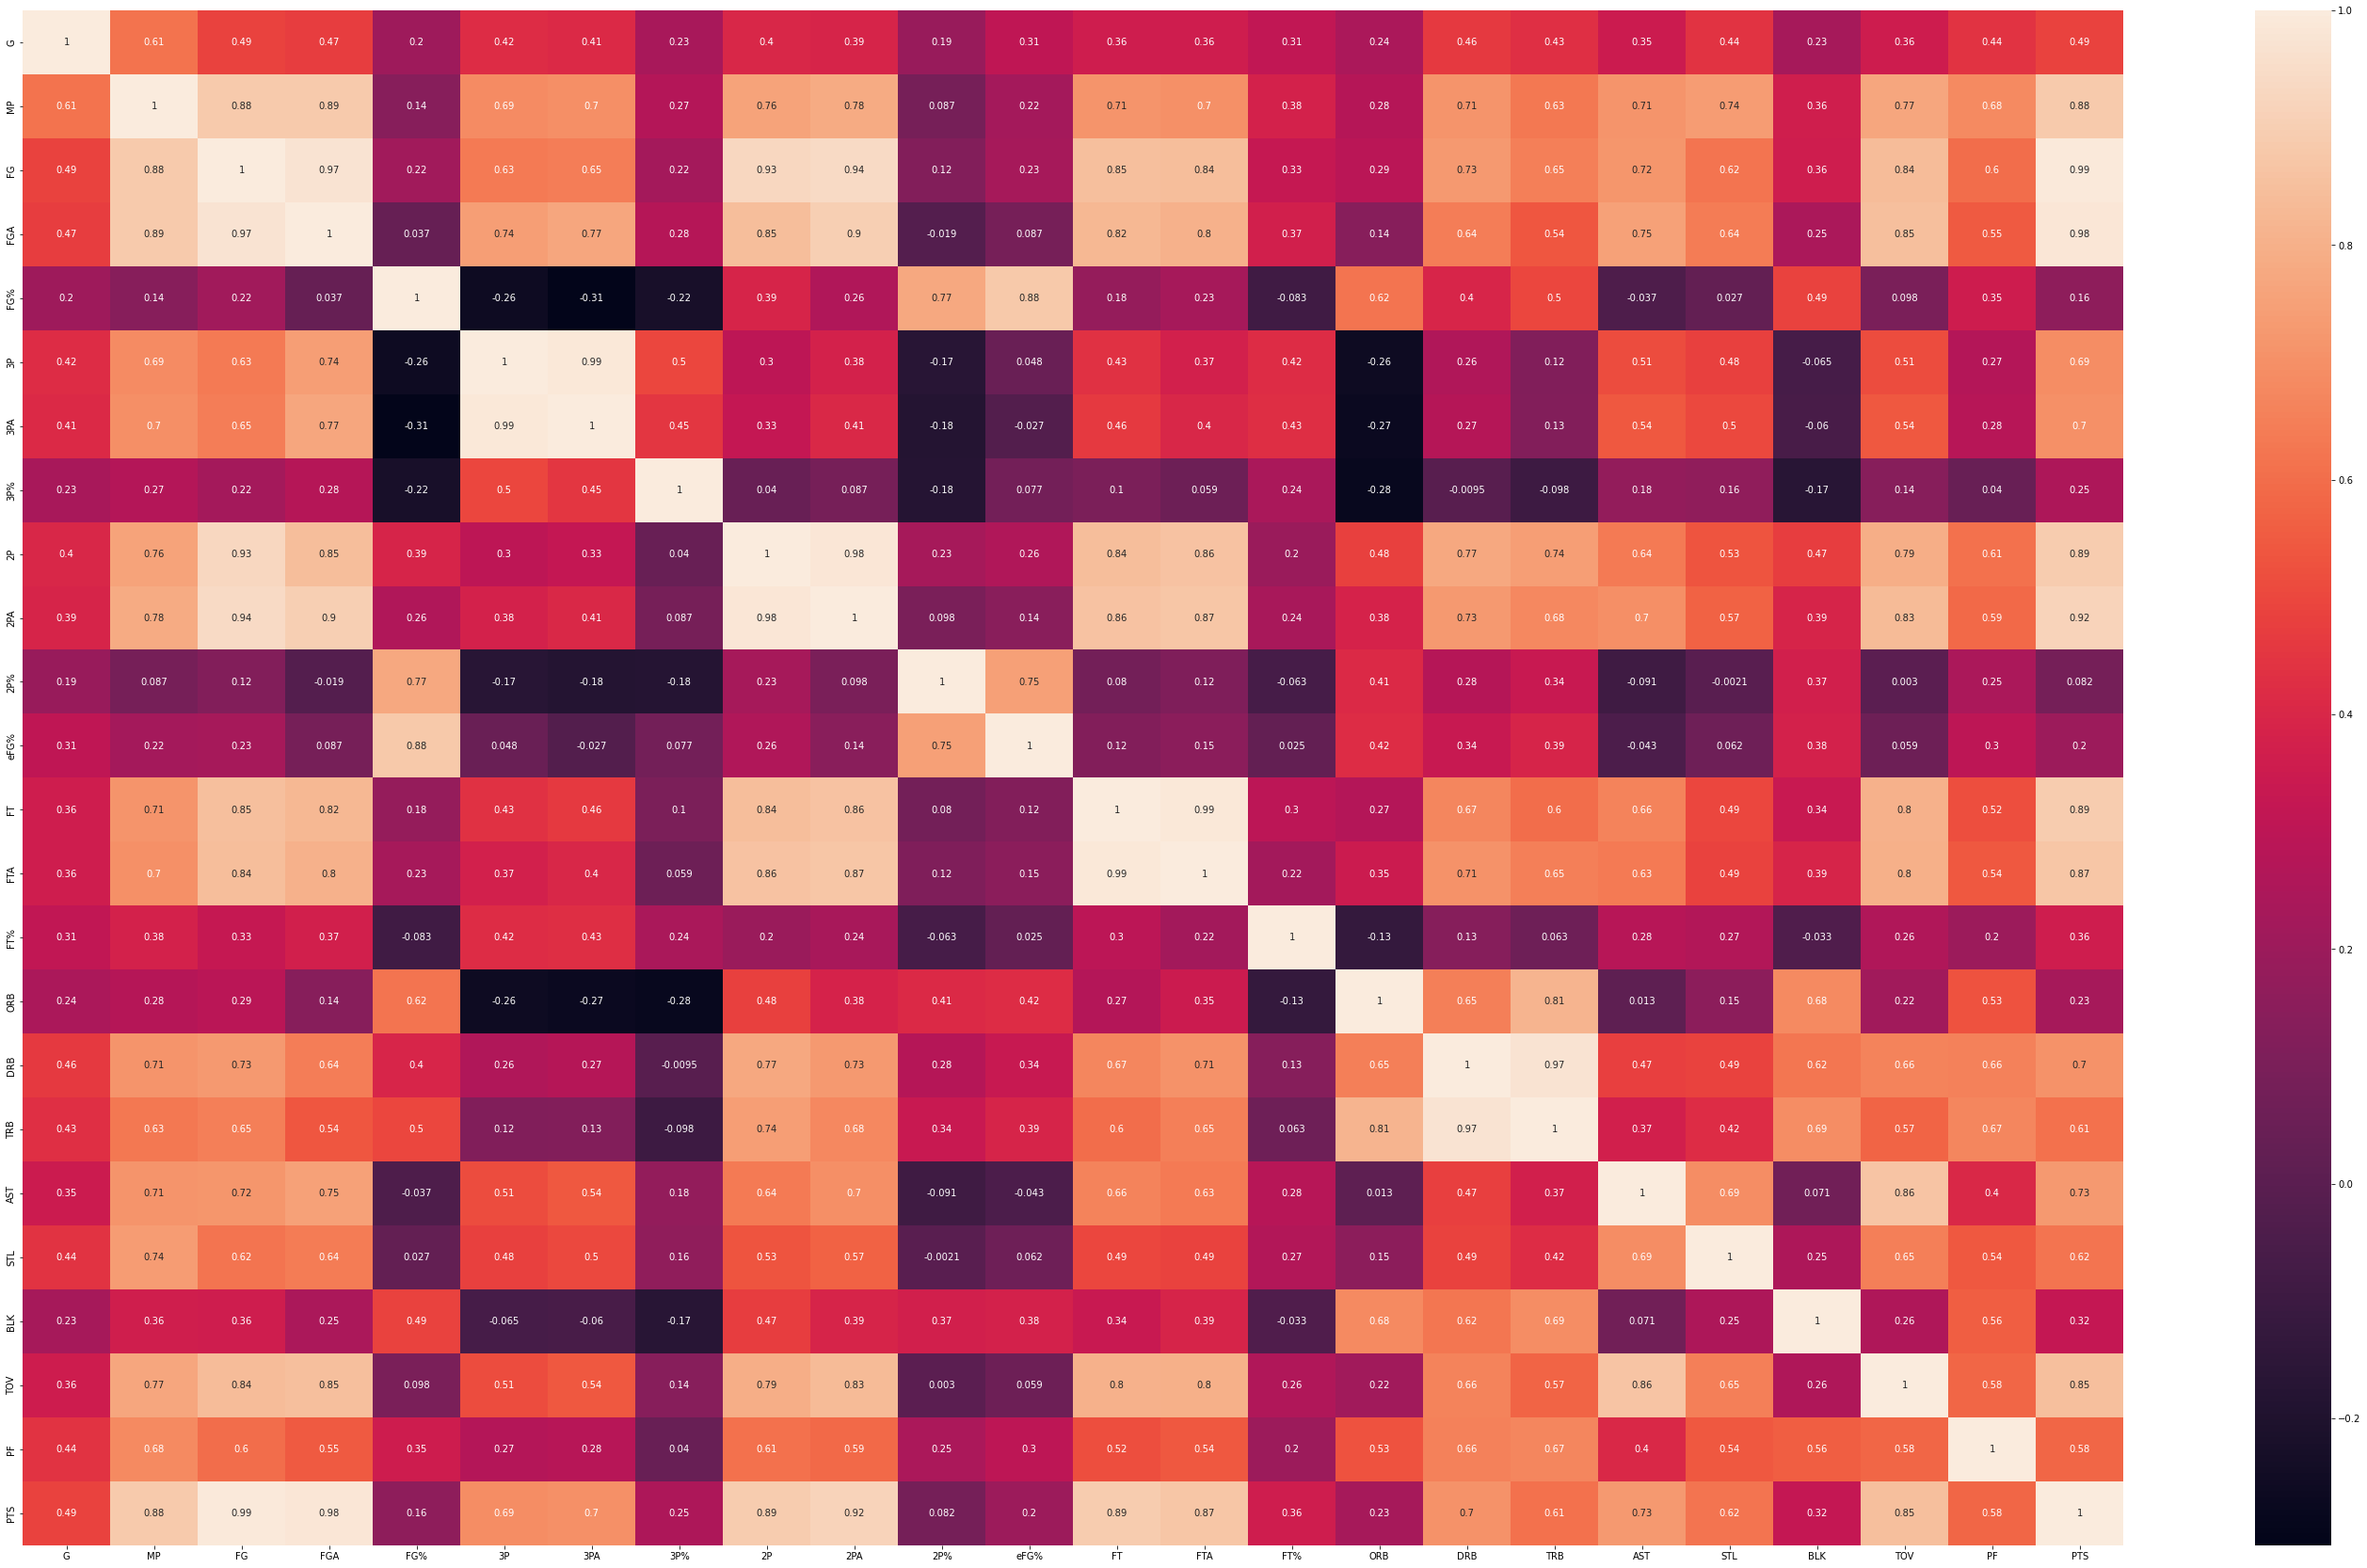

In [13]:
#Make heatmap of data to visualize correlations
_ = plt.subplots(figsize=(50, 30))
_ = sns.heatmap(nba_df.corr(), annot=True)

It makes sense that "FG"/"FGA", "3P"/"3PA", "2P"/"2PA", "FT"/"FTA", and "DRB"/"TRB" since those stats depend on each other.  
Some features such as "PT" had many high correlations such as "PT" with "FG", "MP", "FT", "2P", "2PA".
Some other interesting finds were that "AST"/"TOV", "FT"/"2P", "FG"/"2P". 

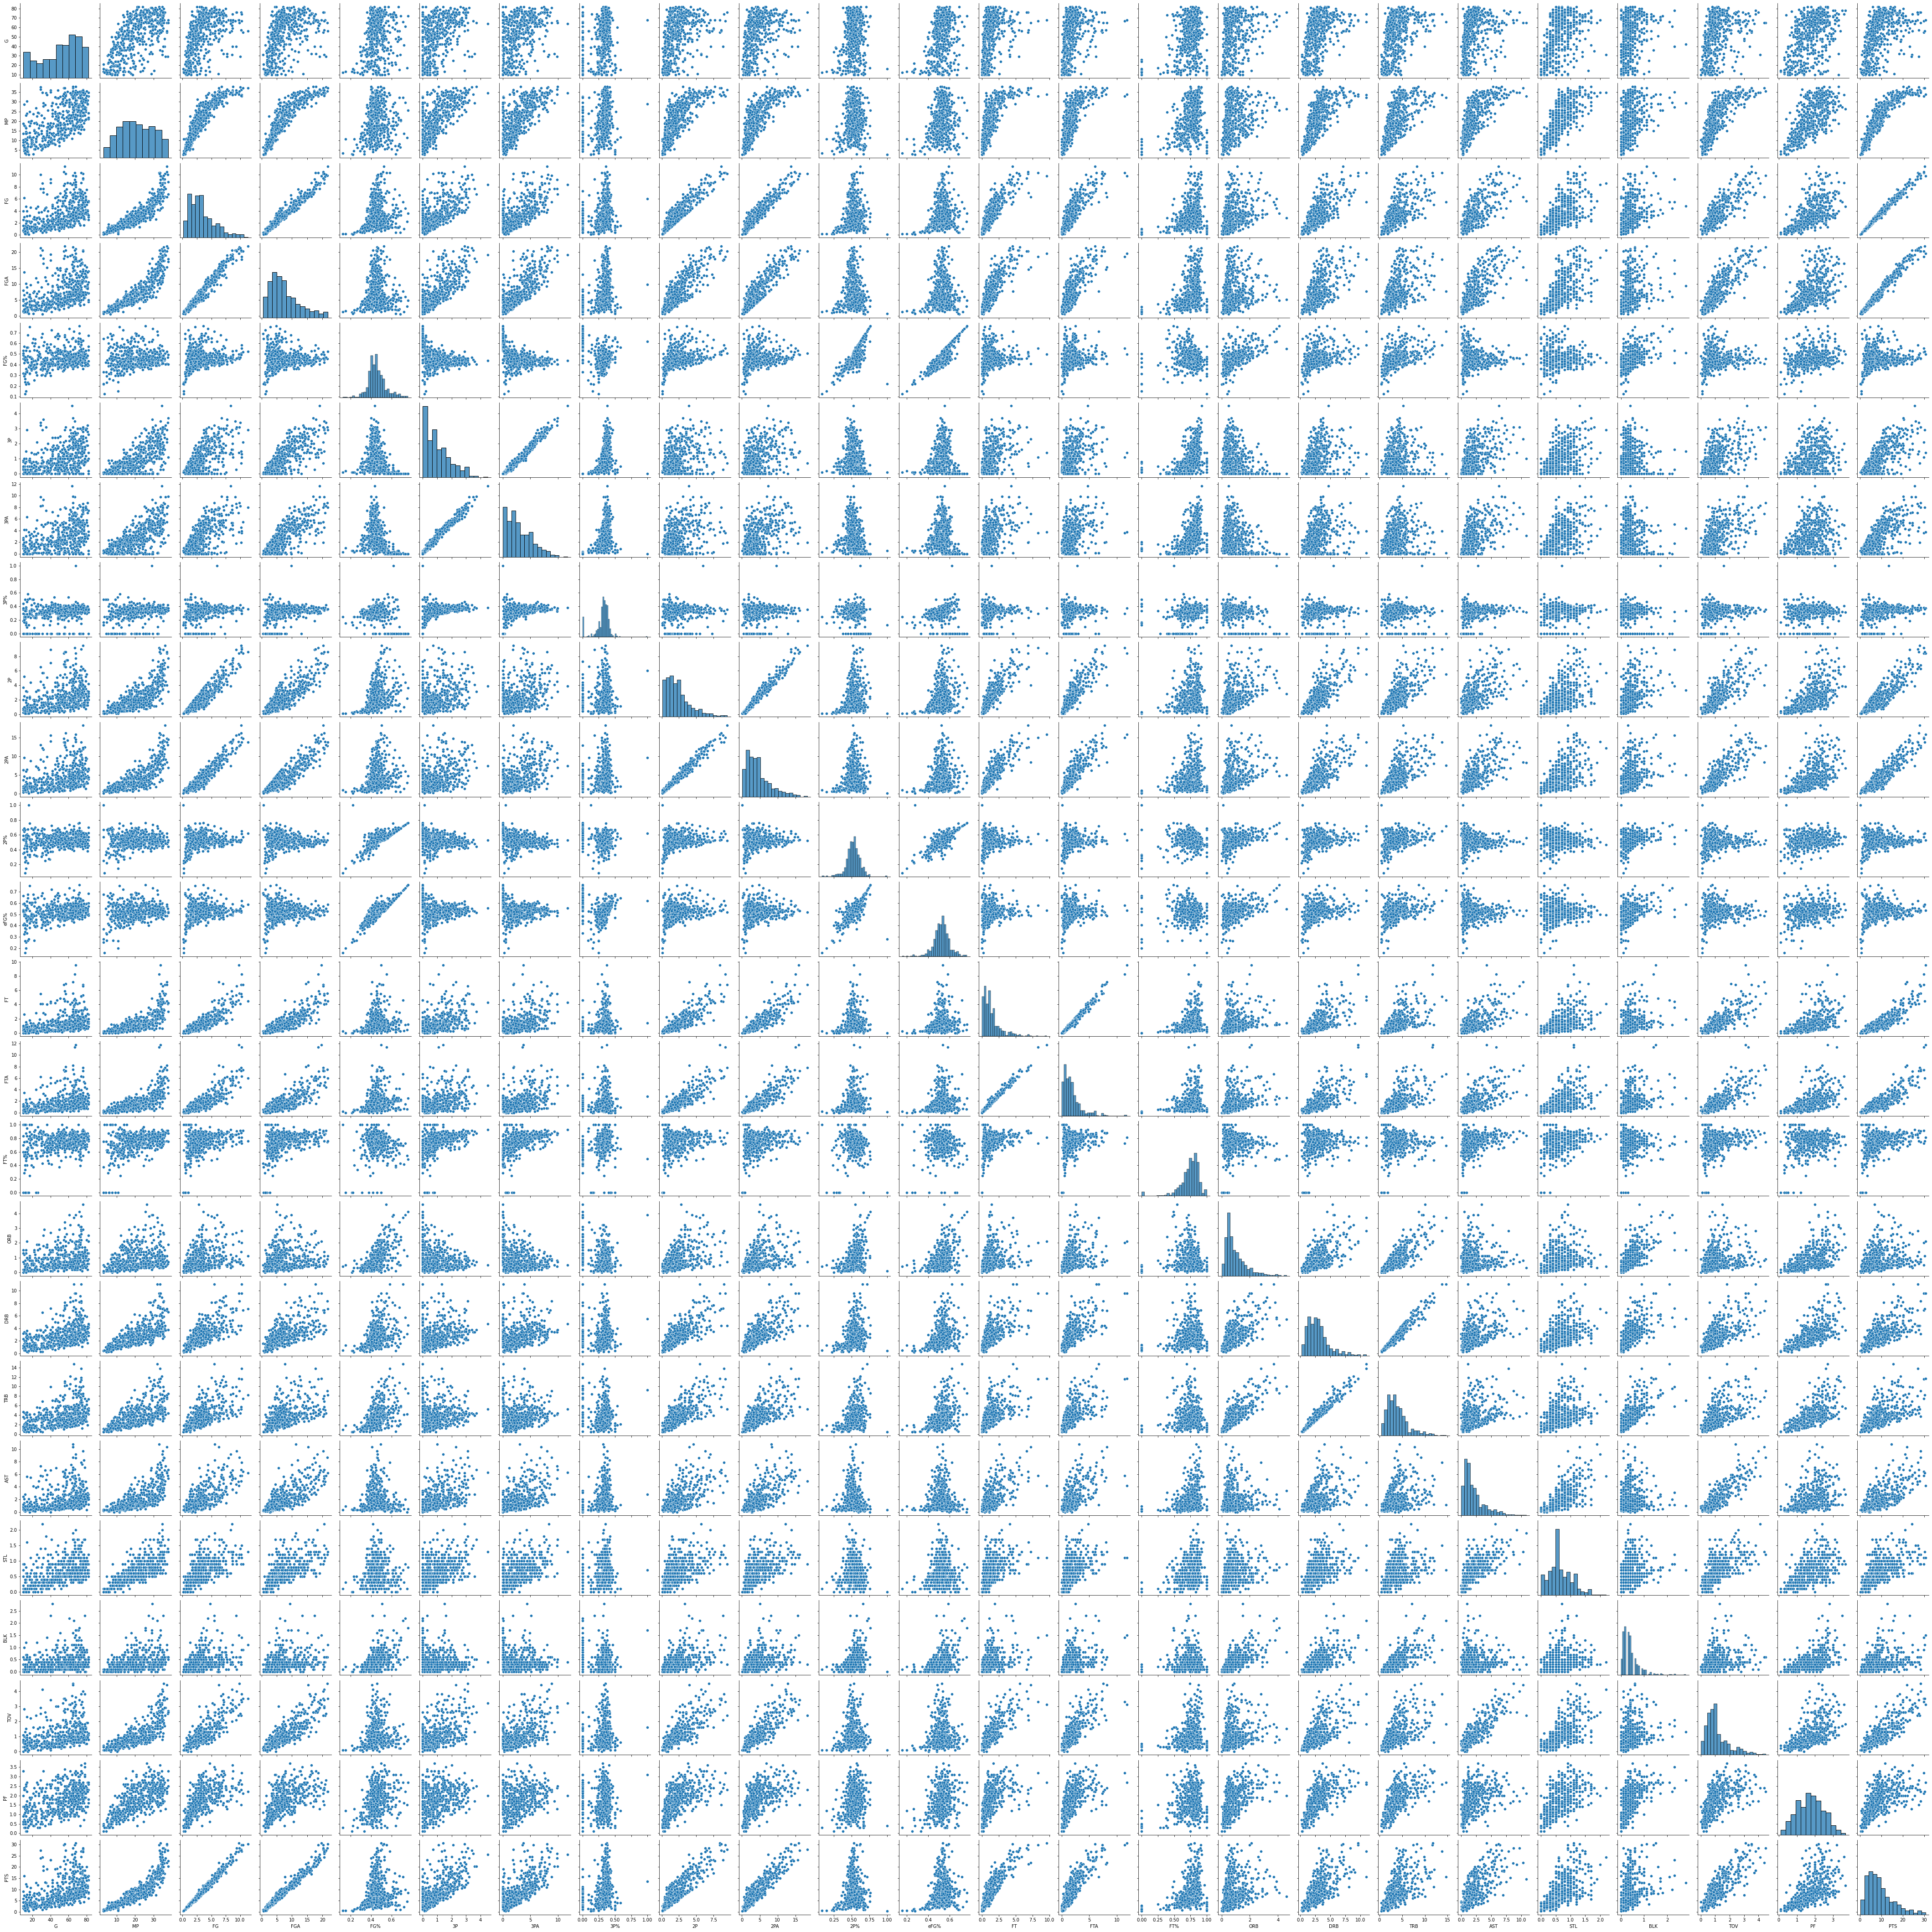

In [14]:
# Make pairplot of data to view how variable relate to one another
_ = sns.pairplot(nba_df)

These pairplots correlate with what we see in the heatmap. 

## Principal Component Analysis (PCA)

In [15]:
# Prepare data by first scaling because features are heterogeneous
# Create new df that indexes "Player" since we want numerical columns
nba_df_scaled = nba_df.set_index('Player')

# Save "Player" labels
nba_df_index = nba_df_scaled.index

# Save column names
nba_df_columns = nba_df_scaled.columns

# View new df appearance
nba_df_scaled.head()

G    MP   FG   FGA    FG%   3P  3PA    3P%   2P   2PA  \
Player                                                                      
Precious Achiuwa   73  23.6  3.6   8.3  0.439  0.8  2.1  0.359  2.9   6.1   
Steven Adams       76  26.3  2.8   5.1  0.547  0.0  0.0  0.000  2.8   5.0   
Bam Adebayo        56  32.6  7.3  13.0  0.557  0.0  0.1  0.000  7.3  12.9   
Santi Aldama       32  11.3  1.7   4.1  0.402  0.2  1.5  0.125  1.5   2.6   
LaMarcus Aldridge  47  22.3  5.4   9.7  0.550  0.3  1.0  0.304  5.1   8.8   

                   ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
Player             ...                                                        
Precious Achiuwa   ...  0.595  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  
Steven Adams       ...  0.543  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  
Bam Adebayo        ...  0.753  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  
Santi Aldama       ...  0.625  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  
LaMarcus Aldridge  ...  0.873  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  

[5 rows x 24 columns]

In [16]:
# Scale data
nba_df_scaled = scale(nba_df_scaled)

In [17]:
# Reintroduce column names into new df
nba_df_s = pd.DataFrame(nba_df_scaled, columns=nba_df_columns)

In [18]:
# View new scaled df appearance
nba_df_s.head()

G        MP        FG       FGA       FG%        3P       3PA  \
0  1.068329  0.313608  0.068946  0.165488 -0.203596 -0.277375 -0.382884   
1  1.215793  0.619889 -0.286904 -0.506714  1.059811 -1.196596 -1.299084   
2  0.232698  1.334543  1.714754  1.152783  1.176793 -1.196596 -1.255455   
3 -0.947015 -1.081669 -0.776199 -0.716777 -0.636429 -0.966791 -0.644655   
4 -0.209694  0.166140  0.869609  0.459576  1.094906 -0.851888 -0.862798   

        3P%        2P       2PA  ...       FT%       ORB       DRB       TRB  \
0  0.427411  0.271534  0.467934  ... -0.933386  1.471679  0.880299  1.137839   
1 -2.745210  0.216701  0.138993  ... -1.270339  4.989206  1.382880  2.632635   
2 -2.745210  2.684191  2.501388  ...  0.090433  2.012837  2.611413  2.675343   
3 -1.640537 -0.496130 -0.578697  ... -0.738990  0.118784 -0.683287 -0.485083   
4 -0.058645  1.477862  1.275335  ...  0.868017  0.930521  0.545245  0.710754   

        AST       STL       BLK       TOV        PF       PTS  
0 -0.535171 -0.410317  0.489769  0.083711  0.498505 -0.040755  
1  0.701410  0.623228  1.020397  0.449795  0.358002 -0.392646  
2  0.701410  1.915159  1.020397  1.792103  1.903536  1.558747  
3 -0.750228 -1.185476 -0.306172 -0.770485 -0.906526 -0.840506  
4 -0.642699 -0.927090  1.551024 -0.282373 -0.063507  0.567055  

[5 rows x 24 columns]

In [19]:
# Verify scaling by first checking mean
nba_df_s.mean()

G       7.993606e-17
MP      2.631229e-17
FG      5.095924e-17
FGA    -1.106337e-16
FG%     3.059775e-16
3P     -1.207923e-16
3PA    -1.025846e-16
3P%     3.037570e-16
2P     -1.192380e-16
2PA     9.592327e-17
2P%     4.622969e-16
eFG%   -5.671019e-16
FT     -5.395684e-17
FTA     6.439294e-17
FT%    -9.279244e-16
ORB    -6.483702e-17
DRB     2.433609e-16
TRB     1.909584e-17
AST    -7.693846e-17
STL     3.033129e-16
BLK     1.421085e-17
TOV     7.271961e-17
PF     -9.947598e-17
PTS     1.674771e-16
dtype: float64

In [20]:
# Check STD
nba_df_s.std(ddof=0)

G       1.0
MP      1.0
FG      1.0
FGA     1.0
FG%     1.0
3P      1.0
3PA     1.0
3P%     1.0
2P      1.0
2PA     1.0
2P%     1.0
eFG%    1.0
FT      1.0
FTA     1.0
FT%     1.0
ORB     1.0
DRB     1.0
TRB     1.0
AST     1.0
STL     1.0
BLK     1.0
TOV     1.0
PF      1.0
PTS     1.0
dtype: float64

In [21]:
# Calculate PCA
nba_pca = PCA().fit(nba_df_s)

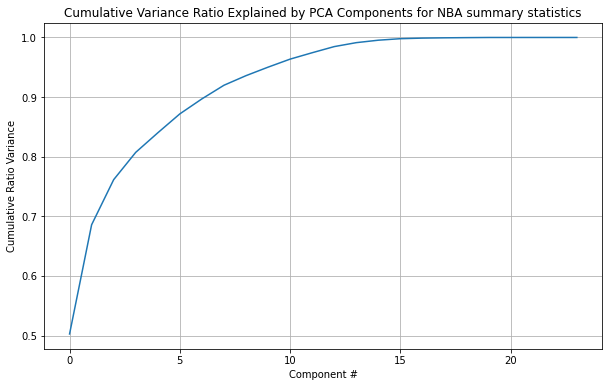

In [22]:
# Plot cumulative variance ratio with components
plt.subplots(figsize=(10, 6))
plt.plot(nba_pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.xlabel('Component #')
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio Explained by PCA Components for NBA summary statistics');

The first 5 components accounts for ~84% of the variance and the first 10 components for ~95% of the variance.

In [23]:
pc_var = 100 * nba_pca.explained_variance_ratio_.cumsum()
pc_var

array([ 50.26504864,  68.58466172,  76.14908259,  80.72957712,
        84.00683661,  87.18288258,  89.6979438 ,  91.98429021,
        93.59345433,  95.01945648,  96.36757869,  97.43909286,
        98.46749657,  99.13002758,  99.54123182,  99.79470181,
        99.89141197,  99.94074967,  99.97238954,  99.99729213,
        99.99843332,  99.9994032 ,  99.99975001, 100.        ])

In [24]:
# Apply transformation to data to obtain derived features
nba_pca_x = nba_pca.transform(nba_df_s)

In [25]:
nba_pca_df = pd.DataFrame(nba_pca.components_, columns=nba_df_columns)

In [26]:
nba_pca_df.head(10)

G        MP        FG       FGA       FG%        3P       3PA  \
0  0.161620  0.265018  0.278293  0.268701  0.080107  0.167162  0.171897   
1  0.003071 -0.069785 -0.048120 -0.138707  0.391664 -0.296205 -0.306745   
2 -0.318873 -0.105556  0.004165  0.011738 -0.231216 -0.286353 -0.234275   
3 -0.301365 -0.156372  0.130445  0.087898  0.274527 -0.050145 -0.062668   
4 -0.148397 -0.026203  0.082492  0.072840 -0.096945  0.158552  0.118730   
5 -0.001108 -0.090326  0.038888  0.022930 -0.077824 -0.034280 -0.034194   
6  0.250662 -0.043820 -0.061325 -0.115586  0.071687 -0.379212 -0.409748   
7 -0.732280 -0.009520 -0.025919 -0.026049  0.051950 -0.009487 -0.020247   
8  0.310243  0.001030  0.018297  0.029368 -0.026714 -0.105629 -0.070579   
9  0.101875 -0.082966 -0.106608 -0.114720 -0.112198 -0.035539 -0.014099   

        3P%        2P       2PA  ...       FT%       ORB       DRB       TRB  \
0  0.053339  0.262903  0.264711  ...  0.097657  0.116078  0.236870  0.217928   
1 -0.223717  0.082268  0.012558  ... -0.160244  0.366765  0.165826  0.242628   
2 -0.351220  0.142371  0.176584  ... -0.232274  0.101840  0.071330  0.086680   
3 -0.029174  0.185668  0.169573  ... -0.061448 -0.262562 -0.197286 -0.235806   
4  0.521920  0.027552  0.021473  ... -0.619091  0.088041  0.128747  0.123990   
5  0.108293  0.060352  0.055790  ...  0.647282  0.106455  0.075301  0.092101   
6  0.632964  0.107426  0.115871  ...  0.086753  0.071425 -0.031359 -0.002190   
7  0.282662 -0.029587 -0.022081  ...  0.232260 -0.062855 -0.100370 -0.099354   
8 -0.012452  0.077057  0.089991  ... -0.186352 -0.209133 -0.420015 -0.386313   
9  0.092196 -0.115454 -0.154036  ...  0.028360 -0.214215  0.101836  0.010042   

        AST       STL       BLK       TOV        PF       PTS  
0  0.214332  0.199589  0.133243  0.252136  0.205035  0.277538  
1 -0.158047 -0.088712  0.288183 -0.078289  0.123847 -0.081489  
2  0.121750 -0.014203  0.041047  0.153478 -0.038487 -0.001994  
3  0.096394 -0.261292 -0.308910  0.096547 -0.325186  0.137136  
4 -0.249166 -0.294130  0.148518 -0.087238 -0.091011  0.083949  
5 -0.364778 -0.477789  0.126250 -0.182463 -0.076412  0.064950  
6  0.221369  0.133821 -0.226742  0.092631 -0.002362 -0.091246  
7  0.044713  0.212697  0.330167  0.102459  0.344254 -0.028859  
8 -0.253575  0.032213  0.282695 -0.160015  0.428014  0.044346  
9  0.148280  0.265185  0.561533 -0.027330 -0.558625 -0.033029  

[10 rows x 24 columns]

## Visualize the First and Second Principal Components

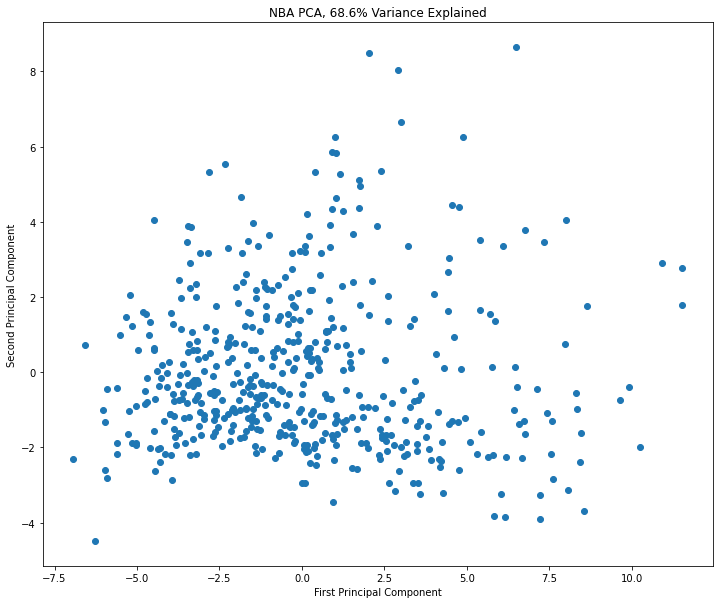

In [36]:
x = nba_pca_x[:, 0]
y = nba_pca_x[:, 1]
player = nba_df_index
pc_var = 100 * nba_pca.explained_variance_ratio_.cumsum()[1]

plt.subplots(figsize=(12,10))
plt.scatter(x=x, y=y)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
_ = plt.title(f'NBA PCA, {pc_var:.1f}% Variance Explained')


## Summary

Besides player names (Player) and position (Pos) columns, all of the features in the NBA dataset were numerical. 

First, an overview of the distributions of the data was explored by viewing histogram subplots of each feature. Most of the features had a relatively normal distribution, but some features were analyzed more in-depth: "G" seems to have almost a bimodal distribution. "MP" has a relatively wide distribution. "FT", "FTA", "BLK", had distributions that were moderately skewed right.  In order to visualize the correlations, a heatmap was done. The heatmap revealed that there were many features that were highly correlated with each other. Some features such as "PT" had many high correlations such as "PT" with "FG", "MP", "FT", "2P", "2PA".
Some other interesting finds were that "AST"/"TOV", "FT"/"2P", "FG"/"2P".  

A principal component analysis (PCA) was performed to explore the variability in the data. The PCA showed that the first 5 components account for ~84% of the variance and the first 10 components for ~95% of the variance.